In [26]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

notification_df = pd.read_csv('notification_sequence.csv', sep = ',')
notification_df = pd.DataFrame(notification_df)

# drop '?'
notification_df = notification_df.replace('?', pd.NaT)    
notification_df = notification_df.dropna(axis=0)

# label encoding
X_categorical_col = ['gender', 'department', 'scenario']
y_categorical_col = ['tol_111111', 'tol_1122', 'tol_123', 'tol_222']

X = notification_df.iloc[:, :-4]
y = notification_df.iloc[:, -4:]

labelencoder = LabelEncoder()
for i in X_categorical_col:
    X[i] = labelencoder.fit_transform(X[i])

le_name_mapping = []
for i in y_categorical_col:
    labelencoder.fit(y[i])
    le_name_mapping.append(dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_))))

# handle X with categorical in 'one-hot encode'
X = pd.get_dummies(X, columns = X_categorical_col)

"\nrng = np.random.RandomState(0)\ncolor = rng.rand(804)\nsizes = 700 * rng.rand(804)\n\nchangecolor = colors.Normalize(vmin=0.4, vmax=0.8)\n\nplt.scatter(X['social_usetime'], y_, c=color, s=sizes, alpha=0.3, cmap='viridis',norm=changecolor)\n\nplt.colorbar()\nplt.show()\n"

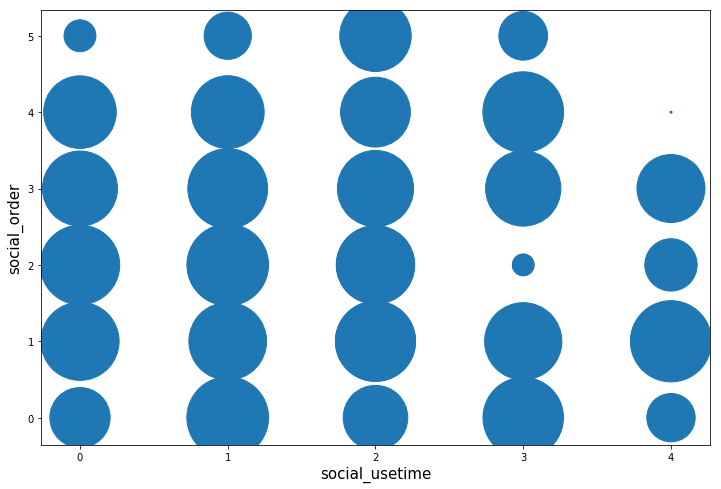

In [68]:
import matplotlib.pyplot as plt
from matplotlib import colors

y_ = []
for i in y.iloc[:, 0]:
    y_.append(i.find('s'))

plt.figure(figsize=(12, 8))
s = [n*n*n*n*n/50000000000 for n in range(len(X['social_usetime']))]
plt.scatter(X['social_usetime'], y_, s = s)
#plt.plot(X['social_usetime'], y_, 'o', markersize=5, alpha=0.5)
#plt.plot(X['social_usetime'], y_ , 'red' , linewidth=1)
plt.xlabel('social_usetime', fontsize=15)
plt.ylabel('social_order', fontsize=15)
#plt.title('Linear Regression', fontsize=20)
#plt.legend(loc='upper right')
"""
rng = np.random.RandomState(0)
color = rng.rand(804)
sizes = 700 * rng.rand(804)

changecolor = colors.Normalize(vmin=0.4, vmax=0.8)

plt.scatter(X['social_usetime'], y_, c=color, s=sizes, alpha=0.3, cmap='viridis',norm=changecolor)

plt.colorbar()
plt.show()
"""